In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modules import coin_simulation, plot_bins 
from modules import hoeffdingsbound, markovsbound

np.random.seed(2017)
%matplotlib inline

# Exercise 1

In [2]:
sim = coin_simulation() # simulates 1000000 simulations of 20 coin flips

In [3]:
df = pd.DataFrame(data=sim)

In [4]:
# Creating a dataframe with summary statistics
df['empirical_mean'] = df.mean(axis=1) #calculates the empircal mean of all experiments
sum_stats = df[[0,'empirical_mean']].groupby('empirical_mean').count().reset_index().rename(columns = {0 : 'freq'})
sum_stats['normed_freq'] = sum_stats['freq'] / np.sum(sum_stats['freq'])

In [5]:
# Creating Hoefdings Bound and Markovs Bound
sum_stats['hoeffding'] = sum_stats.apply(lambda row: hoeffdingsbound(row['empirical_mean']), axis=1)
sum_stats['markov'] = sum_stats.apply(lambda row: markovsbound(row['empirical_mean']), axis=1)

In [6]:
# for plotting data
sum_stats_plot = sum_stats.loc[sum_stats['empirical_mean']>0.5]

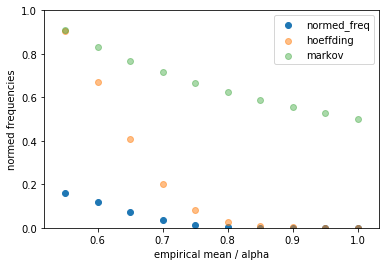

In [13]:
f, (ax1) = plt.subplots(1, 1)

ax1.scatter(sum_stats_plot['empirical_mean'], sum_stats_plot['normed_freq'])
ax1.scatter(sum_stats_plot['empirical_mean'], sum_stats_plot['hoeffding'], alpha=0.5)
ax1.scatter(sum_stats_plot['empirical_mean'], sum_stats_plot['markov'], alpha=0.4)


ax1.set_ylim(0,1)
ax1.Sset
ax1.set_xlabel('empirical mean / alpha')
ax1.set_ylabel('normed frequencies')
ax1.legend()

In [15]:
sum_stats

,empirical_mean,freq,normed_freq,hoeffding,markov
0,0.00,2,0.000002,0.000045,NaN
1,0.05,17,0.000017,0.000304,10.000000
2,0.10,194,0.000194,0.001662,5.000000
3,0.15,1087,0.001087,0.007447,3.333333
4,0.20,4725,0.004725,0.027324,2.500000
5,0.25,14661,0.014661,0.082085,2.000000
6,0.30,36967,0.036967,0.201897,1.666667
7,0.35,73971,0.073971,0.406570,1.428571
8,0.40,120463,0.120463,0.670320,1.250000
9,0.45,160356,0.160356,0.904837,1.111111
